In [233]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **IMPORTACION DE LIBRERIAS**

In [234]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# Librería para manejo de datos
import pandas as pd

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

# **CARGAR DATASET A DATA**

Proposito:

In [235]:
data = pd.read_csv('/content/drive/MyDrive/SIS420-IA/datasets/hotel_bookings.csv')
#data

#Variable Y (Variable Dependiente):

ADR (Tarifa Diaria Promedio)

#Variables X (Variables Independientes)

Adults (Adultos)

Children (Niños)

Babies (Bebés)

Stays in Weekend Nights (Estancias en noches de fin de semana)

Stays in Week Nights (Estancias en noches de semana)

Booking Changes (Cambios en la reserva)

Reserved Room Type (Tipo de habitación reservada)

Customer Type (Tipo de cliente)

Market Segment (Segmento de mercado)

#**REVISAR LOS TIPOS DE DATOS**

In [236]:
print(data.dtypes)

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

#conviertir variables categóricas en variables numéricas codificadas, agragando nuevas columnas Num

In [237]:
data['reserved_room_type_num'] = pd.Categorical(data['reserved_room_type']).codes
data['customer_type_num'] = pd.Categorical(data['customer_type']).codes
data['market_segment_num'] = pd.Categorical(data['market_segment']).codes
data['deposit_type_num'] = pd.Categorical(data['deposit_type']).codes

# **VERIFICAR VALORES FALTANTES**

In [238]:
print(data[['adults','children','babies']].isna().sum())

adults      0
children    4
babies      0
dtype: int64


#**REMPLAZAR VALORES FALTANTES CON CERO**

In [239]:
data['children'] = data['children'].fillna(0)

In [240]:
print(data[['adults','children','babies']].isna().sum())

adults      0
children    0
babies      0
dtype: int64


# **CARGAR DATASET (Y , X)**, utilizando las nuevas columnas que estan en Num

In [241]:
# Seleccionar columnas para X usando las versiones numéricas
X_columns = [
    "adults", "children", "babies", "stays_in_weekend_nights",
    "stays_in_week_nights", "booking_changes",
    "reserved_room_type_num", "customer_type_num", "market_segment_num"
]

X = data[X_columns].to_numpy()  # Convertir a NumPy array
y = data["adr"].to_numpy()      # Variable dependiente

m = y.size  # Número de ejemplos de entrenamiento
print(m)

119390


In [242]:
print(X)

[[2. 0. 0. ... 2. 2. 3.]
 [2. 0. 0. ... 2. 2. 3.]
 [1. 0. 0. ... 0. 2. 3.]
 ...
 [2. 0. 0. ... 3. 2. 6.]
 [2. 0. 0. ... 0. 2. 6.]
 [2. 0. 0. ... 0. 2. 6.]]


In [243]:
print(y)

[  0.     0.    75.   ... 157.71 104.4  151.2 ]


In [244]:
# Seleccionar las columnas correctas para X (variables independientes) y y (variable dependiente)
#X_columns = [
#    "adults", "children", "babies", "stays_in_weekend_nights",
#    "stays_in_week_nights", "booking_changes", "reserved_room_type", "customer_type", "market_segment"
#]

#X = data[X_columns].to_numpy()  # Convertir a NumPy array
#y = data["adr"].to_numpy()  # Variable dependiente

#m = y.size  # Número de ejemplos de entrenamiento
#print(m)

#FUNCION DE NORMALISACION

In [245]:
def  featureNormalize(X):
    X = np.array(X,dtype=np.float64)
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

**NORMALISAR LOS DATOX (X)**

In [246]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[2. 0. 0. ... 2. 2. 3.]
 [2. 0. 0. ... 2. 2. 3.]
 [1. 0. 0. ... 0. 2. 3.]
 ...
 [2. 0. 0. ... 3. 2. 6.]
 [2. 0. 0. ... 0. 2. 6.]
 [2. 0. 0. ... 0. 2. 6.]]
Media calculada: [1.85640338 0.10388642 0.00794874 0.92759863 2.50030153 0.22112405
 0.98950498 2.13732306 4.92810118]
Desviación estandar calculada: [0.57925857 0.39855355 0.09743578 0.99860931 1.90827762 0.65230284
 1.69727503 0.57703771 1.26672022]
[[ 0.24789727 -0.26065863 -0.08157926 ...  0.59536316 -0.23797935
  -1.52212079]
 [ 0.24789727 -0.26065863 -0.08157926 ...  0.59536316 -0.23797935
  -1.52212079]
 [-1.47844749 -0.26065863 -0.08157926 ... -0.58299625 -0.23797935
  -1.52212079]
 ...
 [ 0.24789727 -0.26065863 -0.08157926 ...  1.18454286 -0.23797935
   0.84620013]
 [ 0.24789727 -0.26065863 -0.08157926 ... -0.58299625 -0.23797935
   0.84620013]
 [ 0.24789727 -0.26065863 -0.08157926 ... -0.58299625 -0.23797935
   0.84620013]]


# **AÑADIR COLUMNAS DE 1 A X**

In [247]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(X)

[[ 1.          0.24789727 -0.26065863 ...  0.59536316 -0.23797935
  -1.52212079]
 [ 1.          0.24789727 -0.26065863 ...  0.59536316 -0.23797935
  -1.52212079]
 [ 1.         -1.47844749 -0.26065863 ... -0.58299625 -0.23797935
  -1.52212079]
 ...
 [ 1.          0.24789727 -0.26065863 ...  1.18454286 -0.23797935
   0.84620013]
 [ 1.          0.24789727 -0.26065863 ... -0.58299625 -0.23797935
   0.84620013]
 [ 1.          0.24789727 -0.26065863 ... -0.58299625 -0.23797935
   0.84620013]]


# **FUNCION PARA CALCULAR COSTO**

In [248]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0]
    J = 0
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

# **FUNCION PARA CALCULAR EL DESENSO GRADIENTE**

In [249]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

#**coheficientes de aprendizaje**

theta calculado por el descenso por el gradiente: [ 9.99697484e+01  6.93523355e+00  1.03653404e+01  6.64536877e-01
 -1.28526967e+00 -4.21133502e-01  8.63981283e-01  1.36652479e+01
  1.04139993e-02  8.26298052e+00]
ADR predecido usando descenso por gradiente): [74.75951849 73.92760052 97.64986421]


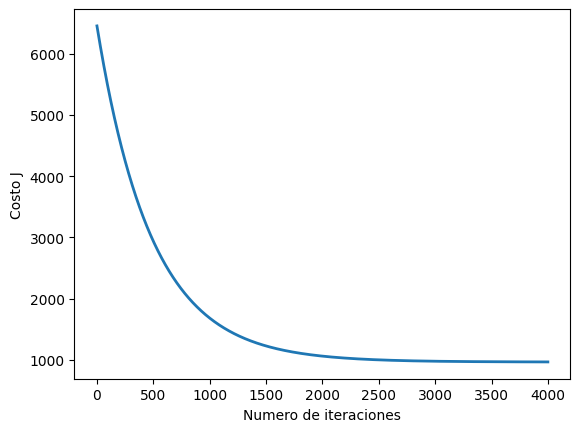

In [250]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 # alpha = 0.003
num_iters = 4000

# inicializa theta y ejecuta el descenso por el gradiente

theta = np.zeros(X.shape[1])  # Se ajusta al número de características

theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Crear el array con las características específicas (ajustar según tus datos)
#X_array = np.array([1, 2, 0, 0, 2, 1, 1, 0, 2, 0])

X_new = np.array([
    [1, 2, 0, 0, 2, 1, 1, 0, 2, 0],   # Ejemplo 1
    [1, 1, 0, 0, 3, 2, 0, 1, 1, 2],   # Ejemplo 2
    [1, 2, 1, 0, 1, 3, 2, 0, 3, 1]    # Ejemplo 3
])

# Normalizar el array de características
#X_array[1:] = (X_array[1:] - mu) / sigma

#X_new[1:] = (X_new[1:] - mu) / sigma

# Normalizar solo las columnas desde la 2 hasta la última (no la columna de unos)
X_new[:, 1:] = (X_new[:, 1:] - mu) / sigma

# Calcular la predicción usando el descenso por el gradiente
#adr_pred = np.dot(X_array, theta)

adr_pred = np.dot(X_new, theta)

#print(f'ADR predecido usando descenso por gradiente): {adr_pred:.2f}')
print(f'ADR predecido usando descenso por gradiente): {adr_pred:}')

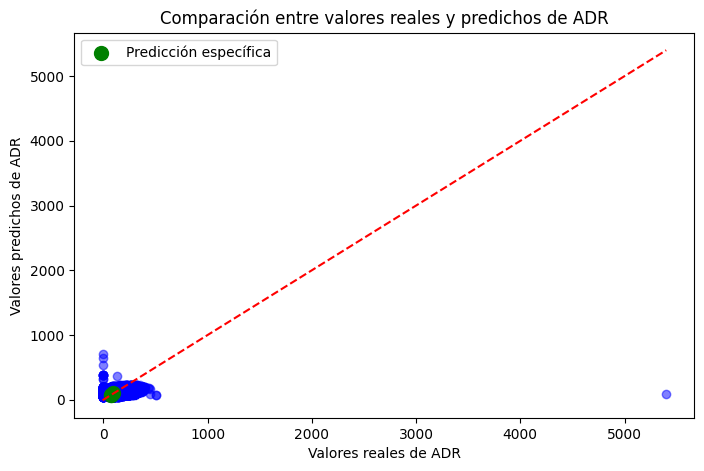

In [251]:
# Comparación entre valores reales y predichos
y_pred = np.dot(X, theta)  # Predicción con los valores de theta calculados

plt.figure(figsize=(8,5))
plt.scatter(y, y_pred, alpha=0.5, color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='dashed')  # Línea ideal
# Añadir el punto de la predicción
plt.scatter(adr_pred, adr_pred, color='green', s=100, label='Predicción específica')
plt.xlabel("Valores reales de ADR")
plt.ylabel("Valores predichos de ADR")
plt.title("Comparación entre valores reales y predichos de ADR")
plt.legend()
plt.show()

# **Ecuacion de la Normal**

#Cargar el archivo CSV

In [252]:
# Cargar el archivo CSV
data = pd.read_csv('/content/drive/MyDrive/SIS420-IA/datasets/hotel_bookings.csv', delimiter=',')
#data

#conviertir variables categóricas en variables numéricas codificadas, agragando nuevas columnas Num

In [253]:
data['reserved_room_type_num'] = pd.Categorical(data['reserved_room_type']).codes
data['customer_type_num'] = pd.Categorical(data['customer_type']).codes
data['market_segment_num'] = pd.Categorical(data['market_segment']).codes
data['deposit_type_num'] = pd.Categorical(data['deposit_type']).codes

#VERIFICAR VALRES FALTANTES

In [254]:
print(data[['adults','children','babies']].isna().sum())

adults      0
children    4
babies      0
dtype: int64


#**REMPLAZAR VALORES FALTANTES CON CERO**

In [255]:
data['children'] = data['children'].fillna(0)

In [256]:
print(data[['adults','children','babies']].isna().sum())

adults      0
children    0
babies      0
dtype: int64


# **CARGAR DATASET (Y , X)**, utilizando las nuevas columnas que estan en Num

In [257]:
# Seleccionar columnas para X usando las versiones numéricas
X_columns = [
    "adults", "children", "babies", "stays_in_weekend_nights",
    "stays_in_week_nights", "booking_changes",
    "reserved_room_type_num", "customer_type_num", "market_segment_num"
]

X = data[X_columns].to_numpy()  # Convertir a NumPy array
y = data["adr"].to_numpy()      # Variable dependiente

m = y.size  # Número de ejemplos de entrenamiento
print(m)

119390


In [258]:
print(X)

[[2. 0. 0. ... 2. 2. 3.]
 [2. 0. 0. ... 2. 2. 3.]
 [1. 0. 0. ... 0. 2. 3.]
 ...
 [2. 0. 0. ... 3. 2. 6.]
 [2. 0. 0. ... 0. 2. 6.]
 [2. 0. 0. ... 0. 2. 6.]]


In [259]:
print(y)

[  0.     0.    75.   ... 157.71 104.4  151.2 ]


# **AÑADIR COLUMNAS DE 1 A X**

In [260]:
# Agregar columna de unos para el término de sesgo (bias)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [261]:
X

array([[1., 2., 0., ..., 2., 2., 3.],
       [1., 2., 0., ..., 2., 2., 3.],
       [1., 1., 0., ..., 0., 2., 3.],
       ...,
       [1., 2., 0., ..., 3., 2., 6.],
       [1., 2., 0., ..., 0., 2., 6.],
       [1., 2., 0., ..., 0., 2., 6.]])

# **Ecuacion de la Normal**

In [262]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [263]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar ADR para una reserva específica
X_array = np.array([1, 2, 0, 0, 2, 1, 1, 0, 2, 0])
adr_pred = np.dot(X_array, theta)


print(f'ADR predecido usando descenso por gradiente):{adr_pred:.2f}')

Theta calculado a partir de la ecuación de la normal: [37.2286932  11.84624222 25.69719511  6.75123601 -1.38812717 -0.23242618
  1.35619041  8.19997106  0.25784117  6.65401165]
ADR predecido usando descenso por gradiente):59.78


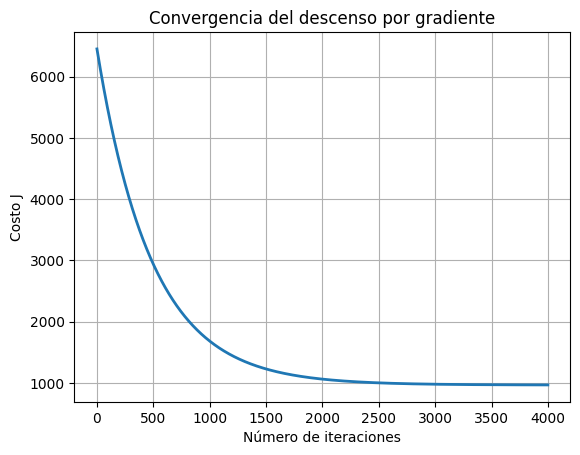

In [264]:
# Grafica la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.title('Convergencia del descenso por gradiente')
plt.grid(True)
plt.show()


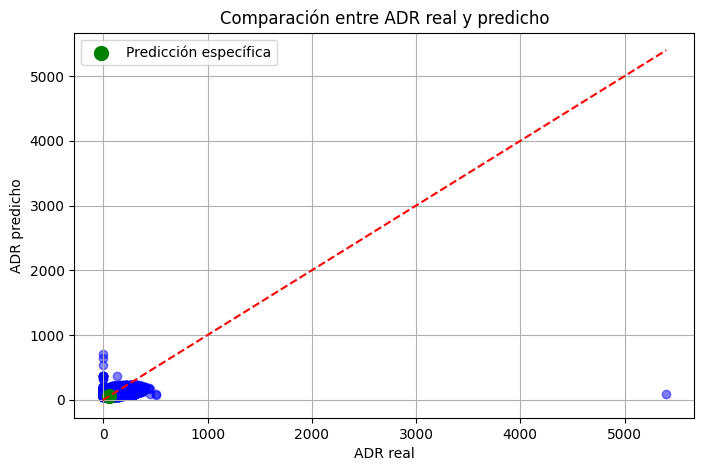

In [265]:
y_pred = np.dot(X, theta)  # Predicciones para todo el dataset

plt.figure(figsize=(8,5))
plt.scatter(y, y_pred, alpha=0.5, color='blue')                  # Todos los puntos
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='dashed')  # Línea ideal
plt.scatter(adr_pred, adr_pred, color='green', s=100, label='Predicción específica')
plt.xlabel("ADR real")
plt.ylabel("ADR predicho")
plt.title("Comparación entre ADR real y predicho")
plt.grid(True)
plt.legend()
plt.show()


#**Programación Regresión Polinomial**

#Cargar el archivo CSV

In [266]:
data = pd.read_csv('/content/drive/MyDrive/SIS420-IA/datasets/hotel_bookings.csv')
#data

#conviertir variables categóricas en variables numéricas codificadas, agragando nuevas columnas Num

In [267]:
data['reserved_room_type_num'] = pd.Categorical(data['reserved_room_type']).codes
data['customer_type_num'] = pd.Categorical(data['customer_type']).codes
data['market_segment_num'] = pd.Categorical(data['market_segment']).codes
data['deposit_type_num'] = pd.Categorical(data['deposit_type']).codes

In [268]:
print(data[['adults','children','babies']].isna().sum())

adults      0
children    4
babies      0
dtype: int64


In [269]:
data['children'] = data['children'].fillna(0)

In [270]:
print(data[['adults','children','babies']].isna().sum())

adults      0
children    0
babies      0
dtype: int64


# **CARGAR DATASET (Y , X)**, utilizando las nuevas columnas que estan en Num

In [271]:
# Seleccionar columnas para X usando las versiones numéricas
X_columns = [
    "adults", "children", "babies", "stays_in_weekend_nights",
    "stays_in_week_nights", "booking_changes",
    "reserved_room_type_num", "customer_type_num", "market_segment_num"
]

X = data[X_columns].to_numpy()  # Convertir a NumPy array
y = data["adr"].to_numpy()      # Variable dependiente

m = y.size  # Número de ejemplos de entrenamiento
print(m)

# imprimir algunos puntos de datos
#print('{:>8s}{:>10s}'.format(X, y))
#print('-'*26)
for i in range(20):
    print(' '.join(f'{val:6.0f}' for val in X[i]), f'{y[i]:10.2f}')

119390
     2      0      0      0      0      3      2      2      3       0.00
     2      0      0      0      0      4      2      2      3       0.00
     1      0      0      0      1      0      0      2      3      75.00
     1      0      0      0      1      0      0      2      2      75.00
     2      0      0      0      2      0      0      2      6      98.00
     2      0      0      0      2      0      0      2      6      98.00
     2      0      0      0      2      0      2      2      3     107.00
     2      0      0      0      2      0      2      2      3     103.00
     2      0      0      0      3      0      0      2      6      82.00
     2      0      0      0      3      0      3      2      5     105.50
     2      0      0      0      4      0      4      2      6     123.00
     2      0      0      0      4      0      3      2      6     145.00
     2      0      0      0      4      0      3      2      6      97.00
     2      1      0      0    

#Trazar los datos

In [272]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = plt.figure()  # abre una nueva figura

    plt.plot(x, y, 'ro', ms=10, mec='k')
    plt.ylabel('Edad personas')
    plt.xlabel('Capacidad adquisitiva 1,000s')

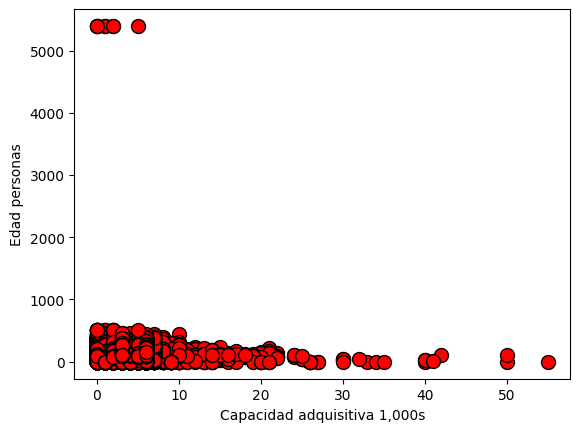

In [273]:
plotData(X, y)

#ampliando la matriz X con nuevas características cuadráticas

In [274]:
X = np.concatenate([X, X * X], axis=1)

In [275]:
print(X)

[[ 2.  0.  0. ...  4.  4.  9.]
 [ 2.  0.  0. ...  4.  4.  9.]
 [ 1.  0.  0. ...  0.  4.  9.]
 ...
 [ 2.  0.  0. ...  9.  4. 36.]
 [ 2.  0.  0. ...  0.  4. 36.]
 [ 2.  0.  0. ...  0.  4. 36.]]


**NORMALISAR LOS DATOX (X)**

In [276]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [277]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

#print(X)
#print('Media calculada:', mu)
#print('Desviación estandar calculada:', sigma)
#print(X_norm)

In [278]:
print(X_norm)

[[ 0.24789727 -0.26065863 -0.08157926 ...  0.01763839 -0.40144647
  -1.53356306]
 [ 0.24789727 -0.26065863 -0.08157926 ...  0.01763839 -0.40144647
  -1.53356306]
 [-1.47844749 -0.26065863 -0.08157926 ... -0.48582175 -0.40144647
  -1.53356306]
 ...
 [ 0.24789727 -0.26065863 -0.08157926 ...  0.64696358 -0.40144647
   0.9178482 ]
 [ 0.24789727 -0.26065863 -0.08157926 ... -0.48582175 -0.40144647
   0.9178482 ]
 [ 0.24789727 -0.26065863 -0.08157926 ... -0.48582175 -0.40144647
   0.9178482 ]]


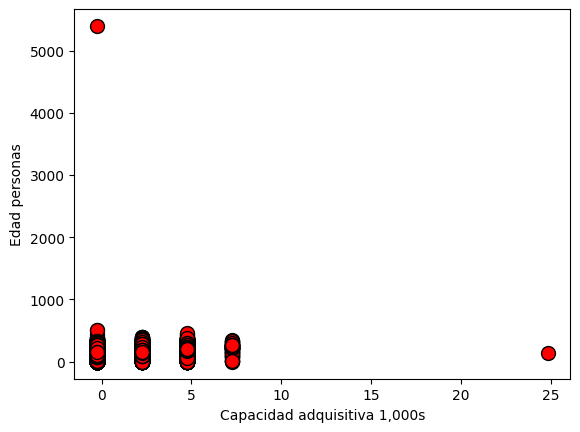

In [279]:
plotData(X_norm[:,1], y)

# **AÑADIR COLUMNAS DE 1 A X**

In [280]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
#X_norm = np.concatenate([X_norm, X_norm * X_norm], axis=1)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [281]:
print(X)

[[ 1.          0.24789727 -0.26065863 ...  0.01763839 -0.40144647
  -1.53356306]
 [ 1.          0.24789727 -0.26065863 ...  0.01763839 -0.40144647
  -1.53356306]
 [ 1.         -1.47844749 -0.26065863 ... -0.48582175 -0.40144647
  -1.53356306]
 ...
 [ 1.          0.24789727 -0.26065863 ...  0.64696358 -0.40144647
   0.9178482 ]
 [ 1.          0.24789727 -0.26065863 ... -0.48582175 -0.40144647
   0.9178482 ]
 [ 1.          0.24789727 -0.26065863 ... -0.48582175 -0.40144647
   0.9178482 ]]


# **FUNCION PARA CALCULAR COSTO**

In [282]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

# **FUNCION PARA CALCULAR EL DESENSO GRADIENTE**

In [283]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [99.96974844  8.91837906  6.72955894  0.74849512 -0.27705017  0.91093551
  1.42343234  7.76858211  2.26834979  3.79542671 -4.30685552  2.51797432
 -0.27472073 -1.13673544 -1.41654051 -0.58341809  6.09466393 -2.81698184
  4.45257673]


ValueError: operands could not be broadcast together with shapes (9,) (18,) 

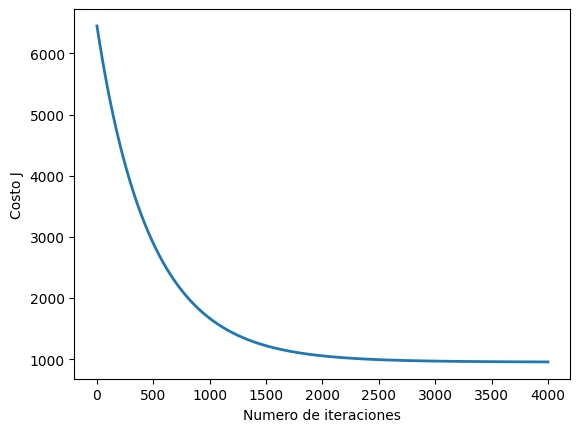

In [284]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 4000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X.shape[1])
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# La capacidad adquisitiva de una persona de 33 años
X_array = [1, 2, 0, 0, 2, 1, 1, 0, 2, 0]
X_array[1:] = (X_array[1:] - mu) / sigma
adr_pred = np.dot(X_array, theta)   # Se debe cambiar esto

print('ADR predicho usando descenso por gradiente: ${:.0f}'.format(adr_pred))